[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


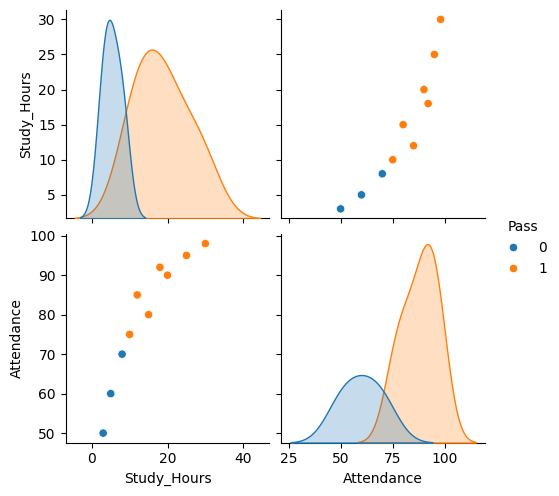

Student Performance Prediction
Accuracy: 1.0
Confusion Matrix:
 [[0 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Sentiment Analysis Results
Accuracy: 0.5
Confusion Matrix:
 [[1 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load Student Performance Data
students_df = pd.read_csv(r"D:\muzakkir\Data Analysis\Dataset\Task 5\students.csv")

# Data Exploration
sns.pairplot(students_df, hue="Pass")
plt.show()

# Train-Test Split
X = students_df[["Study_Hours", "Attendance"]]
y = students_df["Pass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Student Performance Prediction")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=np.unique(y)))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Load Sentiment Analysis Data
reviews_df = pd.read_csv(r"D:\muzakkir\Data Analysis\Dataset\Task 5\reviews.csv")

# Ensure NLTK stopwords and punkt tokenizer are available
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Text Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z ]', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    return ""

reviews_df["Cleaned_Review"] = reviews_df["Review_Text"].apply(preprocess_text)

# Text Vectorization
vectorizer = TfidfVectorizer()
X_reviews = vectorizer.fit_transform(reviews_df["Cleaned_Review"])
y_reviews = reviews_df["Sentiment"].map({"positive": 1, "negative": 0})

# Train-Test Split
X_train_reviews, X_test_reviews, y_train_reviews, y_test_reviews = train_test_split(
    X_reviews, y_reviews, test_size=0.2, random_state=42, stratify=y_reviews)

# Train Logistic Regression Model
model_reviews = LogisticRegression()
model_reviews.fit(X_train_reviews, y_train_reviews)

# Model Evaluation
y_pred_reviews = model_reviews.predict(X_test_reviews)
print("\nSentiment Analysis Results")
print("Accuracy:", accuracy_score(y_test_reviews, y_pred_reviews))
print("Confusion Matrix:\n", confusion_matrix(y_test_reviews, y_pred_reviews, labels=[0, 1]))
print("Classification Report:\n", classification_report(y_test_reviews, y_pred_reviews))
